# Przetwarzanie sygnałów i obrazów: Sprawozdanie 004


### Temat: Analiza widmowa sygnałów.
### Imię i nazwisko studenta: Paweł Niewiarowski, Szymon Łupiński
### Data realizacji ćwiczenia: 16.11.2022

In [1]:
from matplotlib import pyplot
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [2]:
class Plot:
    def __init__(self, x_values, y_values, title,
                 x_label, y_label, ax, y_lim=None):
        self.x_values = x_values
        self.y_values = y_values
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.ax = ax
        self.y_lim = y_lim

    def draw(self):
        self.ax.plot(self.x_values, self.y_values)
        self.ax.set_title(self.title)
        self.ax.set_xlabel(self.x_label)
        self.ax.set_ylabel(self.y_label)
        self.ax.grid()
        if self.y_lim:
            self.ax.set_ylim(self.y_lim[0], self.y_lim[1])

## Zadanie 4.1
Wygenerować/nagrać następujące sygnały (dł. 3s każdy, tempo próbkowania fs = 8kHz):
- szum gaussowski
- sygnał sinusoidalny o stałej częstotliwości 1kHz
- sygnał o zmiennej częstotliwości w zakresie od 0Hz (0s) do 1kHz (5s) (patrz funkcja chirp)
- sygnał mowy

Następnie, dla każdego z sygnałów wykreślić obwiednię mocy w czasie (dla uzyskania lepszej przejrzystości zamiast funkcji stem można użyć funkcji plot).
W celu oszacowania mocy sygnału w czasie Px[n] zastosować uśrednianie wykładnicze/rekursywne, zgodnie ze wzorem: Px[n] = αPx[n-1] + (1-α)x[n]^2,
gdzie x[n] - n-ta próbka sygnału oraz 0<α<1 parametr uśredniający.

Sprawdzić, jaki wpływ na obwiednię mocy ma dobór parametru alfa?

Comożesz powiedzieć o stacjonarności sygnałów na podstawie kształtu obwiedni?


In [3]:
def envelope(x_values, alpha):
    size = len(x_values)
    pxs = np.empty(size)
    pxs[0] = (1 - alpha) * x_values[0] ** 2
    n = 1

    while n <= size - 1:
        pxs[n] = alpha * pxs[n - 1] + (1 - alpha) * x_values[n] ** 2
        n += 1

    return pxs

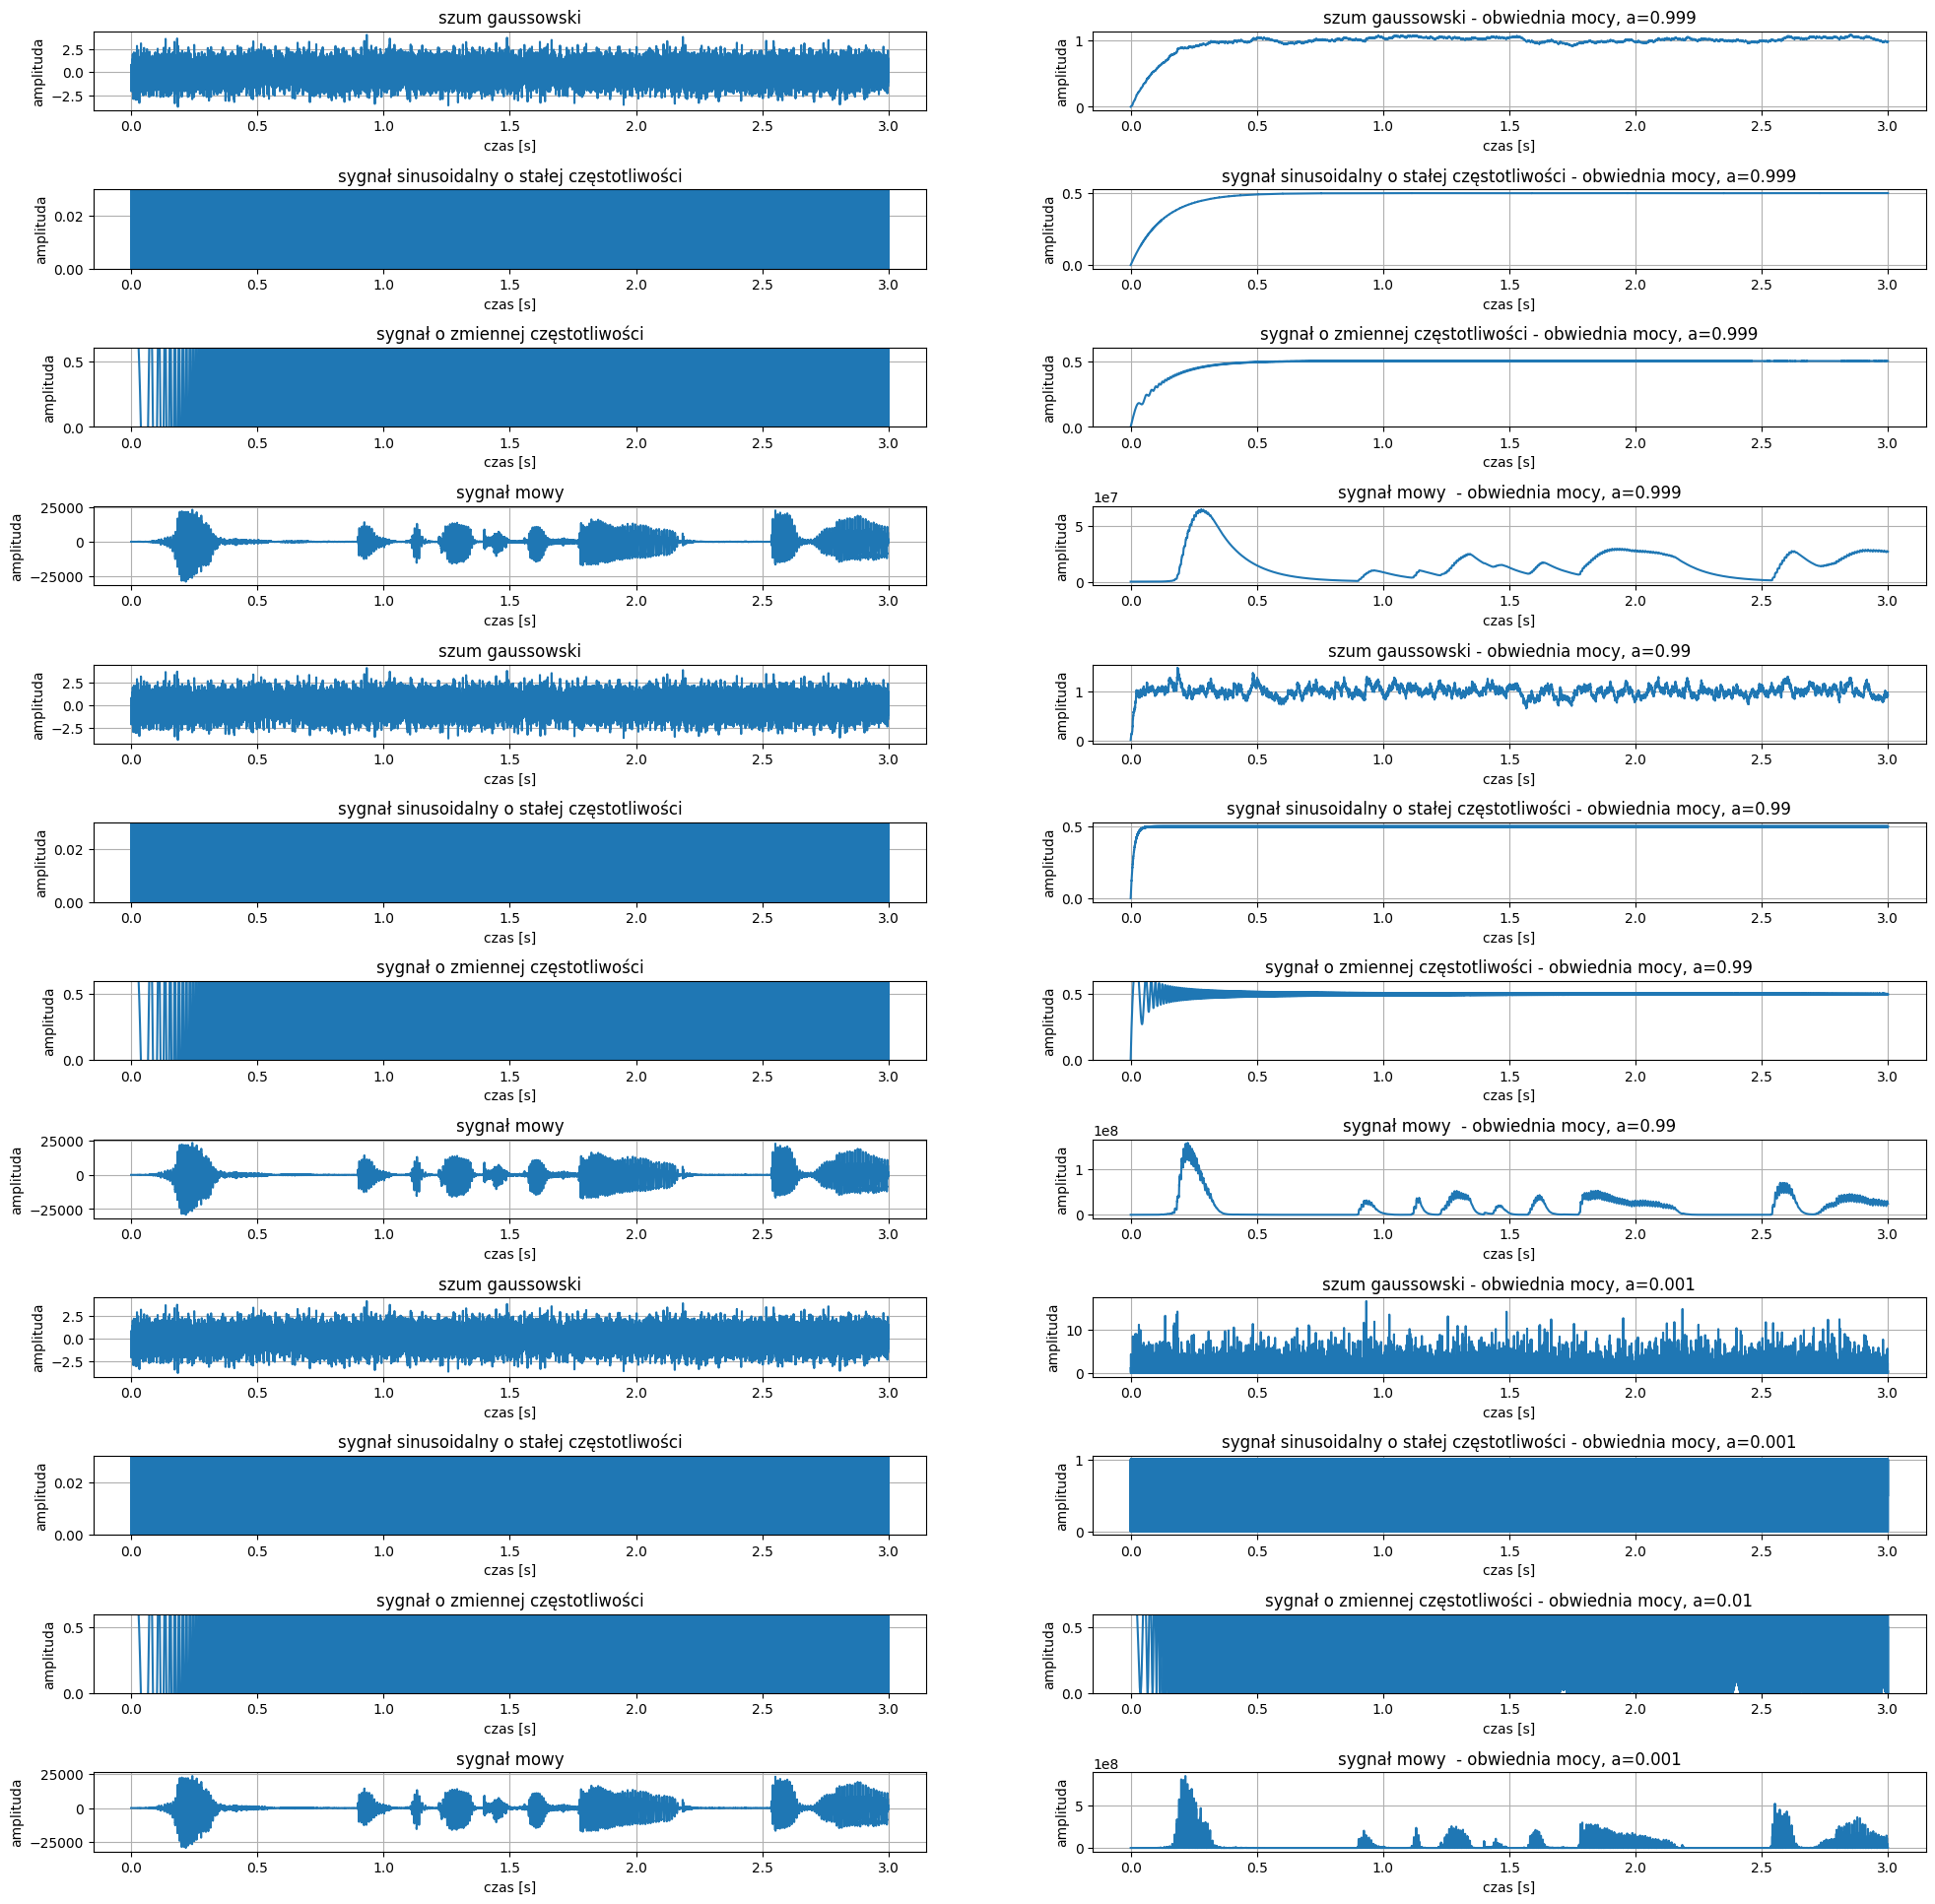

In [4]:
T = 3
FS = 8000
TS = 1 / FS
N = 3 * FS
alphas = [
    0.999,
    0.99,
    0.001,
]

fig, axs = pyplot.subplots(12, 2)
fig.set_size_inches(24, 24)

x_values: np.ndarray = np.arange(0, T, TS)

gauss_values: np.ndarray = np.random.normal(0, 1, N)
sin_values: np.ndarray = np.sin(2 * np.pi * 1000 * x_values)
chirp_values: np.ndarray = signal.chirp(x_values, 0, T, 1000)
speak_values: np.ndarray = wavfile.read('../audio/voice.wav')[1]

for plot in [
    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[0][0]),
    Plot(x_values, envelope(gauss_values, alphas[0]), 'szum gaussowski - obwiednia mocy, a=0.999', 'czas [s]',
         'amplituda', axs[0][1]),

    Plot(x_values, sin_values, 'sygnał sinusoidalny o stałej częstotliwości', 'czas [s]', 'amplituda', axs[1][0],
         (0, T * 0.01)),
    Plot(x_values, envelope(sin_values, alphas[0]),
         'sygnał sinusoidalny o stałej częstotliwości - obwiednia mocy, a=0.999', 'czas [s]', 'amplituda', axs[1][1]),

    Plot(x_values, chirp_values, 'sygnał o zmiennej częstotliwości', 'czas [s]', 'amplituda', axs[2][0], (0, T * 0.2)),
    Plot(x_values, envelope(chirp_values, alphas[0]), 'sygnał o zmiennej częstotliwości - obwiednia mocy, a=0.999',
         'czas [s]', 'amplituda', axs[2][1], (0, T * 0.2)),

    Plot(x_values, speak_values[:24000], 'sygnał mowy', 'czas [s]', 'amplituda', axs[3][0]),
    Plot(x_values, envelope(speak_values[:24000], alphas[0]), 'sygnał mowy  - obwiednia mocy, a=0.999', 'czas [s]',
         'amplituda', axs[3][1]),

    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[4][0]),
    Plot(x_values, envelope(gauss_values, alphas[1]), 'szum gaussowski - obwiednia mocy, a=0.99', 'czas [s]',
         'amplituda', axs[4][1]),

    Plot(x_values, sin_values, 'sygnał sinusoidalny o stałej częstotliwości', 'czas [s]', 'amplituda', axs[5][0],
         (0, T * 0.01)),
    Plot(x_values, envelope(sin_values, alphas[1]),
         'sygnał sinusoidalny o stałej częstotliwości - obwiednia mocy, a=0.99', 'czas [s]', 'amplituda', axs[5][1]),

    Plot(x_values, chirp_values, 'sygnał o zmiennej częstotliwości', 'czas [s]', 'amplituda', axs[6][0], (0, T * 0.2)),
    Plot(x_values, envelope(chirp_values, alphas[1]), 'sygnał o zmiennej częstotliwości - obwiednia mocy, a=0.99',
         'czas [s]', 'amplituda', axs[6][1], (0, T * 0.2)),

    Plot(x_values, speak_values[:24000], 'sygnał mowy', 'czas [s]', 'amplituda', axs[7][0]),
    Plot(x_values, envelope(speak_values[:24000], alphas[1]), 'sygnał mowy  - obwiednia mocy, a=0.99', 'czas [s]',
         'amplituda', axs[7][1]),

    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[8][0]),
    Plot(x_values, envelope(gauss_values, alphas[2]), 'szum gaussowski - obwiednia mocy, a=0.001', 'czas [s]',
         'amplituda', axs[8][1]),

    Plot(x_values, sin_values, 'sygnał sinusoidalny o stałej częstotliwości', 'czas [s]', 'amplituda', axs[9][0],
         (0, T * 0.01)),
    Plot(x_values, envelope(sin_values, alphas[2]),
         'sygnał sinusoidalny o stałej częstotliwości - obwiednia mocy, a=0.001', 'czas [s]', 'amplituda', axs[9][1]),

    Plot(x_values, chirp_values, 'sygnał o zmiennej częstotliwości', 'czas [s]', 'amplituda', axs[10][0], (0, T * 0.2)),
    Plot(x_values, envelope(chirp_values, alphas[2]), 'sygnał o zmiennej częstotliwości - obwiednia mocy, a=0.01',
         'czas [s]', 'amplituda', axs[10][1], (0, T * 0.2)),

    Plot(x_values, speak_values[:24000], 'sygnał mowy', 'czas [s]', 'amplituda', axs[11][0]),
    Plot(x_values, envelope(speak_values[:24000], alphas[2]), 'sygnał mowy  - obwiednia mocy, a=0.001', 'czas [s]',
         'amplituda', axs[11][1]),
]:
    plot.draw()

pyplot.subplots_adjust(hspace=1)
pyplot.show()

## Zadanie 4.2
Wygenerować następujące sygnały z amplitudą jednostkową i częstotliwością 1 kHz oraz czasie trwania 2 sekund:
- sygnał sinusoidalny
- sygnał prostokątny
- sygnał trójkątny
- sygnał piłokształtny
- szum gaussowski
- sygnał sinusoidalny o przestrajanej częstotliwości od 1 kHz do 2 kHz

Dodatkowo wczytać sygnał mowy oraz sygnał muzyki. Rekomendowana częstotliwość próbkowania to 16 kHz dla sygnałów syntetycznych, 8 kHz dla sygnału mowy, 44.1 lub 48 kHz dla sygnału muzyki.

- a) wykreślić wygenerowane sygnały w dziedzinie czasu (skalę czasu na wykresach
dobrać tak, aby zmaksymalizować ich czytelność),

- b) wykonać analizę widmową sygnałów korzystając używając periodogramów.
Sporządzić wykresy w skali decybelowej. Oś pozioma powinna reprezentować
częstotliwość w Hz.


## Zadanie 4.3
Dokonać ponownej analizy sygnałów z zadania poprzedniego w dziedzinie częstotliwości przy użyciu spektrogramów. Użyć funkcji spectrogram lub analogicznej (okno Hamminga o długości 1024 próbek). Zwróć uwagę na to, by osie wykresu były opisane przy użyciu jednostek fizycznych (a nie znormalizowanych).

Co możesz powiedzieć o rozkładzie energii w czasie i częstotliwości analizowanych sygnałów?


## Zadanie 4.4
Ponownie wygenerować spektrogramy dla sygnałów z zadania 4.2 z użyciem melowej skali częstotliwości (tzw. Mel-spektrogramy). Porównać wyniki ze spekrogramami z zadania
poprzedniego.

Co możesz powiedzieć o rozdzielczości spektrogramów dla małych częstotliwości?